# 다중 분류
- Wine data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
seed = 2022
np.random.seed(seed)
tf.random.set_seed(seed)

- 데이터 전처리

In [2]:
from sklearn.datasets import load_wine
wine = load_wine()


In [3]:
wine.data.shape

(178, 13)

In [4]:
wine

{'DESCR': '.. _wine_dataset:\n\nWine recognition dataset\n------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 178 (50 in each of three classes)\n    :Number of Attributes: 13 numeric, predictive attributes and the class\n    :Attribute Information:\n \t\t- Alcohol\n \t\t- Malic acid\n \t\t- Ash\n\t\t- Alcalinity of ash  \n \t\t- Magnesium\n\t\t- Total phenols\n \t\t- Flavanoids\n \t\t- Nonflavanoid phenols\n \t\t- Proanthocyanins\n\t\t- Color intensity\n \t\t- Hue\n \t\t- OD280/OD315 of diluted wines\n \t\t- Proline\n\n    - class:\n            - class_0\n            - class_1\n            - class_2\n\t\t\n    :Summary Statistics:\n    \n    ============================= ==== ===== ======= =====\n                                   Min   Max   Mean     SD\n    ============================= ==== ===== ======= =====\n    Alcohol:                      11.0  14.8    13.0   0.8\n    Malic Acid:                   0.74  5.80    2.34  1.12\n    Ash:           

In [5]:
#X 데이터는 표준화
from sklearn.preprocessing import StandardScaler
wine_std = StandardScaler().fit_transform(wine.data)

In [6]:
# y데이터는 원핫인코딩
from tensorflow.keras.utils import to_categorical
Y = to_categorical(wine.target)
Y[:5]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(
    wine_std, Y, stratify=Y, test_size = 0.2, random_state = seed
)
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape #Y를 원핫인코딩해서 3차원이 됨

((142, 13), (36, 13), (142, 3), (36, 3))

- 모델 정의/ 설정/ 학습/ 평가

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [9]:
model = Sequential([
    Dense(30, input_dim = 13, activation='relu'), #첫번째 은닉층
    Dense(12, activation='relu'),
    Dense(3, activation='softmax')   #노드수는 Y의 종류(N)수, 활성화함수는 softmax
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                420       
                                                                 
 dense_1 (Dense)             (None, 12)                372       
                                                                 
 dense_2 (Dense)             (None, 3)                 39        
                                                                 
Total params: 831
Trainable params: 831
Non-trainable params: 0
_________________________________________________________________


In [10]:
# 다중분류 시 손실 함수는 categorical_crossentropy
model.compile('adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [11]:
#학습
hist = model.fit(X_train, Y_train, validation_split=0.2, epochs = 100, batch_size=100)

Epoch 1/100
2/2 [==============================] - 1s 152ms/step - loss: 1.9052 - accuracy: 0.3097 - val_loss: 1.6885 - val_accuracy: 0.2414
Epoch 2/100
2/2 [==============================] - 0s 24ms/step - loss: 1.7975 - accuracy: 0.3274 - val_loss: 1.5971 - val_accuracy: 0.2414
Epoch 3/100
2/2 [==============================] - 0s 23ms/step - loss: 1.6979 - accuracy: 0.3274 - val_loss: 1.5142 - val_accuracy: 0.2414
Epoch 4/100
2/2 [==============================] - 0s 20ms/step - loss: 1.6102 - accuracy: 0.3363 - val_loss: 1.4398 - val_accuracy: 0.2759
Epoch 5/100
2/2 [==============================] - 0s 21ms/step - loss: 1.5276 - accuracy: 0.3363 - val_loss: 1.3735 - val_accuracy: 0.3103
Epoch 6/100
2/2 [==============================] - 0s 24ms/step - loss: 1.4533 - accuracy: 0.3540 - val_loss: 1.3120 - val_accuracy: 0.3448
Epoch 7/100
2/2 [==============================] - 0s 22ms/step - loss: 1.3849 - accuracy: 0.3894 - val_loss: 1.2561 - val_accuracy: 0.3448
Epoch 8/100
2/2 [==

In [12]:
model.evaluate(X_test,Y_test)

2/2 [==============================] - 0s 4ms/step - loss: 0.1301 - accuracy: 0.9722


[0.13005691766738892, 0.9722222089767456]

- 학습과정 시각화

In [13]:
y_acc = hist.history['accuracy']
y_vloss = hist.history['val_loss']
xs = np.arange(1, len(y_acc)+1)

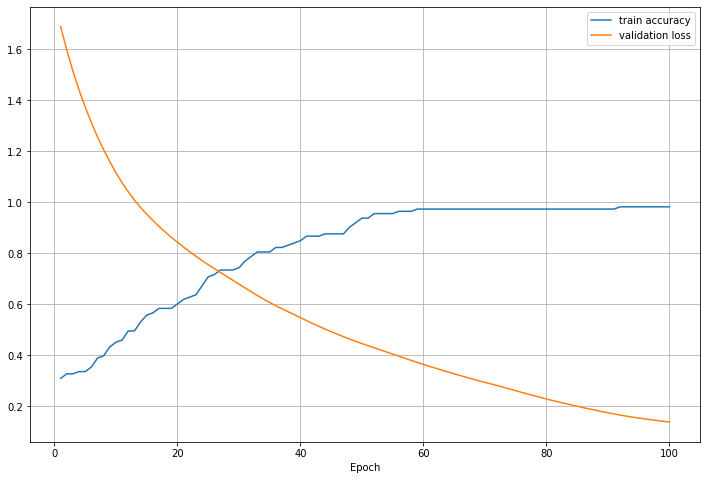

In [14]:
plt.figure(figsize=(12,8))
plt.plot(xs,y_acc,label='train accuracy')
plt.plot(xs,y_vloss, label = 'validation loss')
plt.legend(),plt.grid()
plt.xlabel('Epoch')
plt.show()

- Epoch 횟수를 늘려서 학습을 더 해보자

In [15]:
model2 = Sequential([
    Dense(30, input_dim = 13, activation='relu'), #첫번째 은닉층
    Dense(12, activation='relu'),
    Dense(3, activation='softmax')   #노드수는 Y의 종류(N)수, 활성화함수는 softmax
])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 30)                420       
                                                                 
 dense_4 (Dense)             (None, 12)                372       
                                                                 
 dense_5 (Dense)             (None, 3)                 39        
                                                                 
Total params: 831
Trainable params: 831
Non-trainable params: 0
_________________________________________________________________


In [16]:
# 다중분류 시 손실 함수는 categorical_crossentropy
model2.compile('adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [17]:
hist2 = model2.fit(X_train, Y_train, validation_split=0.2,
                   epochs = 1000, batch_size=100, verbose=0)

In [18]:
model2.evaluate(X_test,Y_test)

2/2 [==============================] - 0s 6ms/step - loss: 6.3747e-04 - accuracy: 1.0000


[0.0006374737713485956, 1.0]

In [19]:
y_acc2 = hist2.history['accuracy']
y_vloss2 = hist2.history['val_loss']
xs2 = np.arange(1, len(y_acc2)+1)

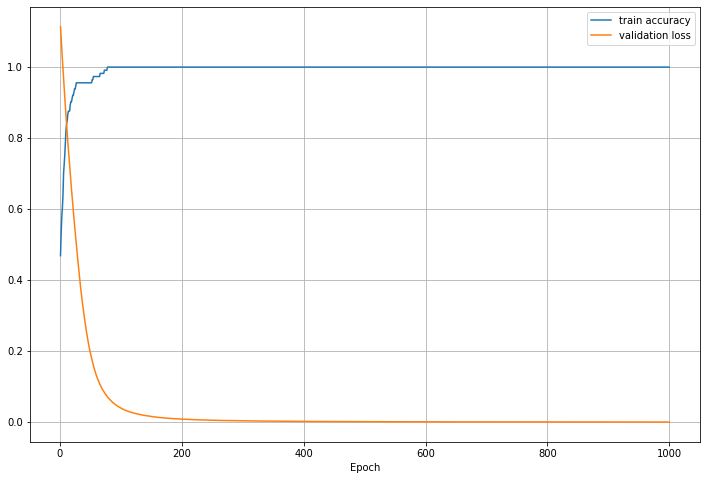

In [20]:
plt.figure(figsize=(12,8))
plt.plot(xs2,y_acc2,label='train accuracy')
plt.plot(xs2,y_vloss2, label = 'validation loss')
plt.legend(),plt.grid()
plt.xlabel('Epoch')
plt.show()

- 모델 저장 및 로드

In [21]:
model2.save('wine.h5')

In [22]:
!ls -l

total 48
drwxr-xr-x 1 root root  4096 May 17 13:39 sample_data
-rw-r--r-- 1 root root 43704 May 23 00:59 wine.h5


In [23]:
from tensorflow.keras.models import load_model
my_model = load_model('wine.h5')

In [24]:
my_model.evaluate(X_test,Y_test)

2/2 [==============================] - 0s 3ms/step - loss: 6.3747e-04 - accuracy: 1.0000


[0.0006374737713485956, 1.0]

- 실제 데이터로 테스트

In [25]:
wine_std[100], Y[100]

(array([-1.13720713, -0.23011443, -2.43634632, -0.59905169, -0.192495  ,
        -0.10433159,  0.14128858, -0.82071924, -0.33447089, -0.76049691,
         1.37126518,  0.49197446, -0.11748635]),
 array([0., 1., 0.], dtype=float32))

In [26]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [27]:
my_model.evaluate(wine_std[100].reshape(1,-1),Y[100].reshape(1,-1))

1/1 [==============================] - 0s 15ms/step - loss: 1.9073e-06 - accuracy: 1.0000


[1.9073468138230965e-06, 1.0]